Importo librerías

In [1]:
import ciw
import pandas as pd
import matplotlib.pyplot as plt

Tenemos una estación de servicios con 2 mangueras, y durante horas normales recibe autos cada 2 minutos exactos. Cada playero atiende a su cliente en 4 minutos exactos.

## Sistema D/D/S

Tasa de arribos y tasa de servicio determinística, es decir, sin variabilidad. D/D/2 en este caso ya que hay dos mangueras.

,id_number,server_id,arrival_date,waiting_time,service_time,exit_date,queue_size_at_departure
0,1,1,2,0,4,6,2
1,2,2,4,0,4,8,1
2,3,1,6,0,4,10,1
3,4,2,8,0,4,12,2
4,5,1,10,0,4,14,2
5,6,2,12,0,4,16,2
6,7,1,14,0,4,18,1
7,8,2,16,0,4,20,1
8,9,1,18,0,4,22,2
9,10,2,20,0,4,24,2


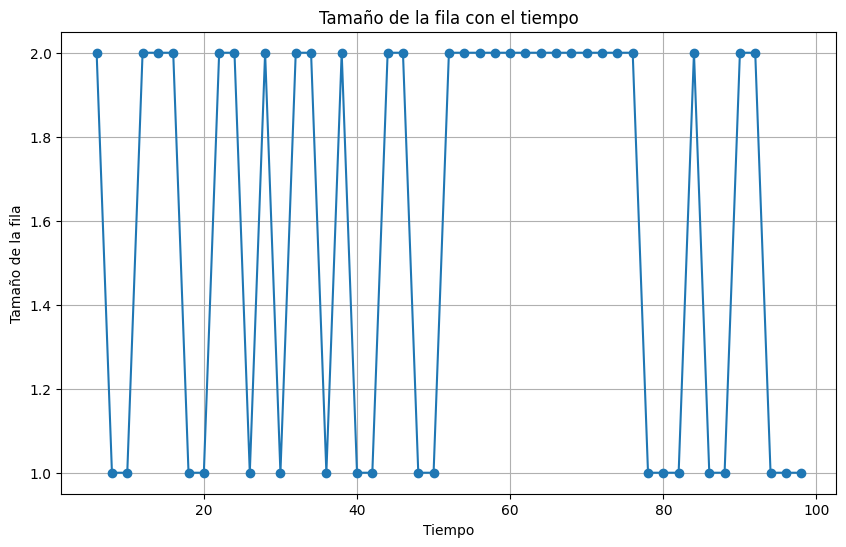

Utilización teórica: 1.0
Utilización empírica: 0.97


In [2]:
# Define los parámetros de la red
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Deterministic(value=2)],
    service_distributions=[ciw.dists.Deterministic(value=4)],
    number_of_servers=[2]
)

# Inicializa la simulación
ciw.seed(1)
Q = ciw.Simulation(N)

# Ejecuta la simulación
Q.simulate_until_max_time(100)

# Obtiene los registros de la simulación
data = Q.get_all_records()

# Crea un DataFrame de Pandas
df = pd.DataFrame(data)

# Muestra el DataFrame
display(df[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_time', 'exit_date', 'queue_size_at_departure']])

# Ordena las fechas de salida en orden ascendente
df = df.sort_values(by='exit_date')

# Crea un nuevo gráfico
plt.figure(figsize=(10,6))

# Dibuja una línea que muestre el tamaño de la fila en función del tiempo
plt.plot(df['exit_date'], df['queue_size_at_departure'], marker='o')

# Añade etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la fila')
plt.title('Tamaño de la fila con el tiempo')

# Muestra el gráfico
plt.grid(True)
plt.show()

print(f'Utilización teórica: {(4) / 2 * (1/2)}')
print(f'Utilización empírica: {Q.transitive_nodes[0].server_utilisation}')

Qué pasa si agregamos variabilidad en el tiempo de arribo?

### Modelo M/D/S

Tiempo entre llegadas independiente y exponencial, tasa de servicio determinística. En este caso, M/D/2

,id_number,server_id,arrival_date,waiting_time,service_time,exit_date,queue_size_at_departure
0,1,1,0.288582,0.000000,4.0,4.288582,1
1,2,2,4.048895,0.000000,4.0,8.048895,2
2,3,1,6.934833,0.000000,4.0,10.934833,3
3,4,2,7.523760,0.525135,4.0,12.048895,2
4,5,1,8.891878,2.042955,4.0,14.934833,2
...,...,...,...,...,...,...,...
490,491,1,974.862062,12.982900,4.0,991.844962,4
491,492,2,977.612892,10.485889,4.0,992.098781,3
492,493,1,979.189070,12.655892,4.0,995.844962,2
493,494,2,985.890763,6.208019,4.0,996.098781,2


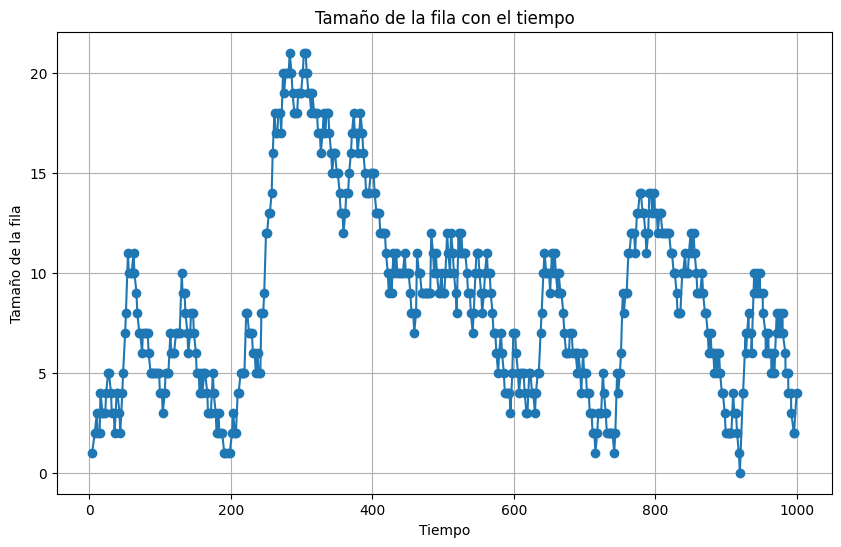

Utilización teórica: 1.0
Utilización empírica: 0.9920281284406511


In [3]:
# Define los parámetros de la red
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=1/2)],
    service_distributions=[ciw.dists.Deterministic(value=4)],
    number_of_servers=[2]
)

# Inicializa la simulación
ciw.seed(1)
Q = ciw.Simulation(N)

# Ejecuta la simulación
Q.simulate_until_max_time(1000)

# Obtiene los registros de la simulación
data = Q.get_all_records()

# Crea un DataFrame de Pandas
df = pd.DataFrame(data)

# Muestra el DataFrame
display(df[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_time', 'exit_date', 'queue_size_at_departure']])


# Ordena las fechas de salida en orden ascendente
df = df.sort_values(by='exit_date')

# Crea un nuevo gráfico
plt.figure(figsize=(10,6))

# Dibuja una línea que muestre el tamaño de la fila en función del tiempo
plt.plot(df['exit_date'], df['queue_size_at_departure'], marker='o')

# Añade etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la fila')
plt.title('Tamaño de la fila con el tiempo')

# Muestra el gráfico
plt.grid(True)
plt.show()


print(f'Utilización teórica: {(4) / 2 * (1/2)}')
print(f'Utilización empírica: {Q.transitive_nodes[0].server_utilisation}')

Si agregamos variabilidad en el tiempo de servicio?

### Modelo D/M/S

Tasa de servicio independiente y exponencial, tiempo de arribo determinístico. En este caso, D/M/2

,id_number,server_id,arrival_date,waiting_time,service_time,exit_date,queue_size_at_departure
0,1,1,2,0.000000,0.577164,2.577164,0
1,2,1,4,0.000000,7.520625,11.520625,3
2,3,2,6,0.000000,5.771876,11.771876,2
3,4,1,8,3.520625,1.177855,12.698480,2
4,5,2,10,1.771876,2.736235,14.508111,2
...,...,...,...,...,...,...,...
477,478,2,956,24.554923,4.602071,985.156994,14
478,479,1,958,24.280321,6.263421,988.543742,15
479,480,2,960,25.156994,6.614701,991.771695,15
480,482,2,964,27.771695,3.153147,994.924842,16


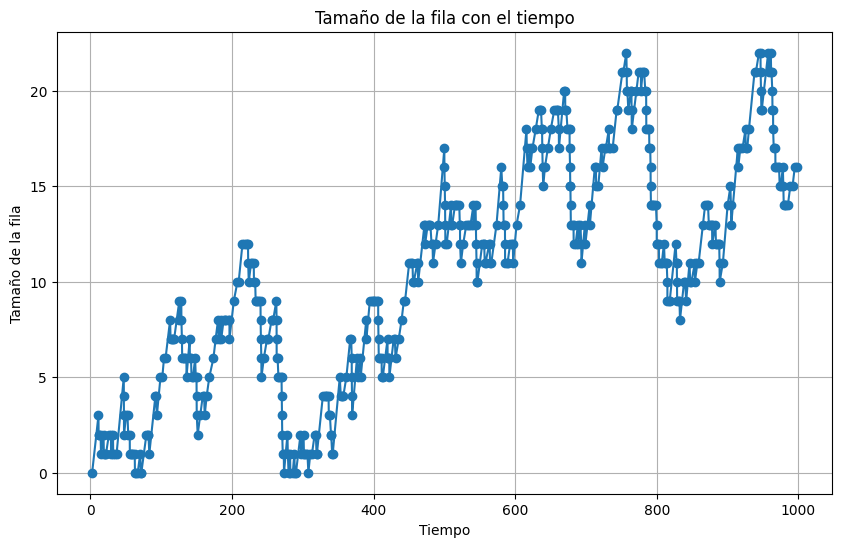

Utilización teórica: 1.0
Utilización empírica: 0.9606035845603683


In [4]:
# Define los parámetros de la red
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Deterministic(value=2)],
    service_distributions=[ciw.dists.Exponential(rate=1/4)],
    number_of_servers=[2]
)

# Inicializa la simulación
ciw.seed(1)
Q = ciw.Simulation(N)

# Ejecuta la simulación
Q.simulate_until_max_time(1000)

# Obtiene los registros de la simulación
data = Q.get_all_records()

# Crea un DataFrame de Pandas
df = pd.DataFrame(data)

# Muestra el DataFrame
display(df[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_time', 'exit_date', 'queue_size_at_departure']])

# Ordena las fechas de salida en orden ascendente
df = df.sort_values(by='exit_date')

# Crea un nuevo gráfico
plt.figure(figsize=(10,6))

# Dibuja una línea que muestre el tamaño de la fila en función del tiempo
plt.plot(df['exit_date'], df['queue_size_at_departure'], marker='o')

# Añade etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la fila')
plt.title('Tamaño de la fila con el tiempo')

# Muestra el gráfico
plt.grid(True)
plt.show()

print(f'Utilización teórica: {(4) / 2 * (1/2)}')
print(f'Utilización empírica: {Q.transitive_nodes[0].server_utilisation}')

Por último, si agregamos variabilidad tanto en tasa de arribo como en tiempo de servicio?

### Modelo M/M/S

Tasa de servicio independiente y exponencial, tiempo de arribo independiente y exponencial. En este caso, M/M/2

,id_number,server_id,arrival_date,waiting_time,service_time,exit_date,queue_size_at_departure
0,2,2,3.174520,0.000000,1.177855,4.352375,1
1,3,2,4.542638,0.000000,2.387648,6.930286,2
2,4,2,6.651405,0.278881,0.394244,7.324530,1
3,1,1,0.288582,0.000000,7.520625,7.809207,0
4,5,1,9.760579,0.000000,0.115028,9.875607,0
...,...,...,...,...,...,...,...
466,467,1,960.072309,14.336613,7.191815,981.600737,13
467,469,1,963.943233,17.657504,11.682900,993.283637,17
468,470,1,964.463960,28.819677,0.505187,993.788823,16
469,471,1,964.516927,29.271896,1.233359,995.022182,17


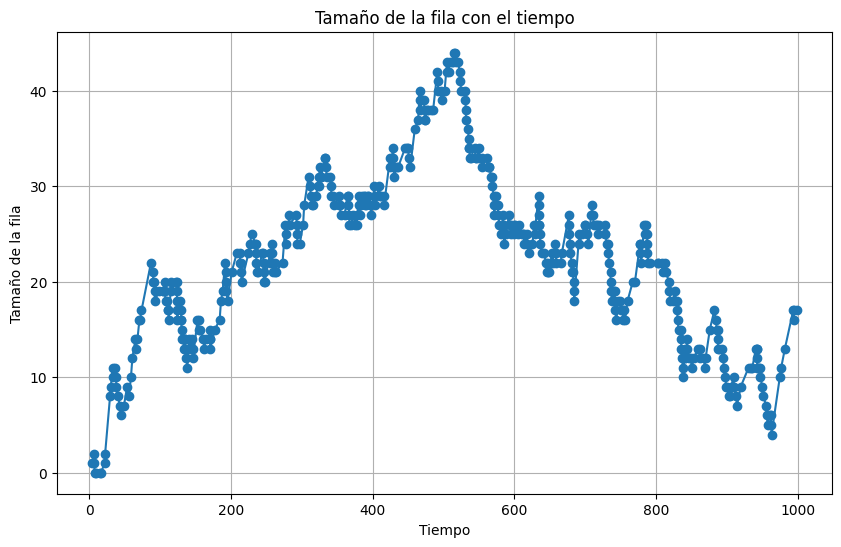

Utilización teórica: 1.0
Utilización empírica: 0.9892305810382654


In [5]:
# Define los parámetros de la red
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=1/2)],
    service_distributions=[ciw.dists.Exponential(rate=1/4)],
    number_of_servers=[2]
)

# Inicializa la simulación
ciw.seed(1)
Q = ciw.Simulation(N)

# Ejecuta la simulación
Q.simulate_until_max_time(1000)

# Obtiene los registros de la simulación
data = Q.get_all_records()

# Crea un DataFrame de Pandas
df = pd.DataFrame(data)

# Muestra el DataFrame
display(df[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_time', 'exit_date', 'queue_size_at_departure']])

# Ordena las fechas de salida en orden ascendente
df = df.sort_values(by='exit_date')

# Crea un nuevo gráfico
plt.figure(figsize=(10,6))

# Dibuja una línea que muestre el tamaño de la fila en función del tiempo
plt.plot(df['exit_date'], df['queue_size_at_departure'], marker='o')

# Añade etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la fila')
plt.title('Tamaño de la fila con el tiempo')

# Muestra el gráfico
plt.grid(True)
plt.show()


print(f'Utilización teórica: {(4) / 2 * (1/2)}')
print(f'Utilización empírica: {Q.transitive_nodes[0].server_utilisation}')